## 중심 극한 정리의 증명

In [ ]:
# 패키지 설치
import numpy as np # 난수 생성
import matplotlib.pyplot as plt # 그래픽 패키지

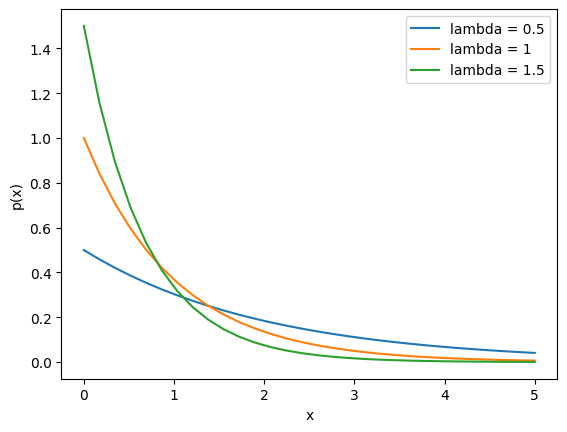

In [ ]:
# matplotlib.pyplot 모듈 임포트
import matplotlib.pyplot as plt

# figure 생성
fig = plt.figure()

# 데이터 생성
lamda_values = [0.5, 1, 1.5]
x = np.linspace(0, 5, 30)

# 각 람다 값에 대한 데이터 플롯
for lamda in lamda_values:
    y = lamda * np.exp(-lamda * x)
    plt.plot(x, y, label=f'lambda = {lamda}')

# 라벨과 범례 추가
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()

# 플롯 표시
plt.show()

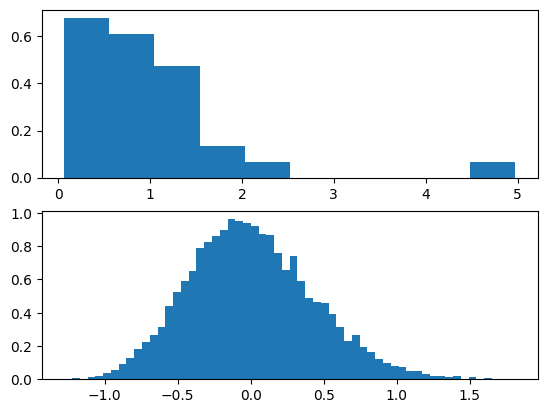

In [ ]:
# 모듈 임포트
import numpy as np
import matplotlib.pyplot as plt

# 표본 크기 설정
n = 30
lamda = 1
smean = np.zeros(10000)

# 반복 루프
for i in range(0, 10000):
    S = np.random.exponential(lamda, n)
    smean[i] = (np.mean(S) - (1/lamda))/np.sqrt(1/lamda/np.sqrt(n))

# Create subplots
fig, ax = plt.subplots(2)

# Plot histograms
ax[0].hist(S, bins='auto', density=True)
ax[1].hist(smean, bins='auto', density=True)

# Display the plot
plt.show()

## 통계분석 연습의 준비 - 판다스 연결

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sample_data_final_1_eng.csv')

In [ ]:
data.head()

,programtype,dramapref,varietypref,brandaware,brandpref,programaware,programpref,modelaware,modelpref,gender,pplaware,fun,like,reactance,brandattitude,programattitude,job,city,age
0,2,4,4,7,7,7,4,1,1,female,yes,5.00,4.00,6.00,3.00,3.33,student,busan,22
1,2,4,7,7,5,7,5,7,7,male,yes,3.50,6.67,6.00,2.00,2.33,student,busan,24
2,2,5,6,7,3,7,4,7,7,female,yes,4.75,5.00,2.75,4.33,3.67,student,busan,20
3,2,6,2,7,4,3,2,2,2,female,no,3.75,2.00,4.00,6.00,4.00,student,busan,23
4,2,2,7,3,3,6,4,6,6,male,yes,5.00,5.33,4.00,5.67,3.67,student,busan,22


In [ ]:
#데이터 구조 확인하기
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   programtype      176 non-null    int64  
 1   dramapref        176 non-null    int64  
 2   varietypref      176 non-null    int64  
 3   brandaware       176 non-null    int64  
 4   brandpref        176 non-null    int64  
 5   programaware     176 non-null    int64  
 6   programpref      176 non-null    int64  
 7   modelaware       176 non-null    int64  
 8   modelpref        176 non-null    int64  
 9   gender           176 non-null    object 
 10  pplaware         176 non-null    object 
 11  fun              176 non-null    float64
 12  like             176 non-null    float64
 13  reactance        176 non-null    float64
 14  brandattitude    176 non-null    float64
 15  programattitude  176 non-null    float64
 16  job              176 non-null    object 
 17  city            

In [ ]:
#각 변수의 최소값을 확인
data.min()

programtype              1
dramapref                1
varietypref              1
brandaware               1
brandpref                1
programaware             1
programpref              1
modelaware               1
modelpref                1
gender              female
pplaware                no
fun                    1.0
like                   1.0
reactance              1.0
brandattitude          1.0
programattitude        1.0
job                student
city                 busan
age                     17
dtype: object

In [ ]:
#수치형 데이터의 통계적 개요를 확인
data.describe(include='all')

NameError: name 'data' is not defined

## 기술통계량

In [ ]:
#평균
data['programpref'].mean()

3.403409090909091

In [ ]:
#중앙값
data['programpref'].median()

4.0

In [ ]:
#최빈값
data['programpref'].mode()[0]

4

In [ ]:
#분산
data['programpref'].var()

1.9791883116883118

In [ ]:
#표준편차
data['programpref'].std()

1.4068362774993797

In [ ]:
#사분위수를 포함한 기술통계치 확인
data.describe()

,programtype,dramapref,varietypref,brandaware,brandpref,programaware,programpref,modelaware,modelpref,fun,like,reactance,brandattitude,programattitude,age
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.500000,4.278409,4.971591,5.988636,4.068182,5.465909,3.403409,4.113636,3.835227,3.759943,3.623295,4.579545,4.089091,3.997841,22.284091
std,0.501427,1.487775,1.479108,1.461853,1.294343,1.703434,1.406836,2.234441,2.108787,1.380569,1.600176,1.532759,1.549643,1.199360,3.118420
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000
25%,1.000000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.750000,2.330000,3.750000,3.000000,3.330000,20.000000
50%,1.500000,4.000000,5.000000,7.000000,4.000000,6.000000,4.000000,4.000000,4.000000,3.875000,3.670000,4.750000,4.000000,4.000000,22.000000
75%,2.000000,5.000000,6.000000,7.000000,5.000000,7.000000,4.000000,6.000000,6.000000,4.750000,4.670000,5.750000,5.000000,4.330000,23.000000
max,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.750000,7.000000,7.000000,7.000000,7.000000,37.000000


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt #그래프 생성을 위한 패키지

In [ ]:
#crosstab으로 빈도표 출력하기
table=data['brandpref']
pd.crosstab(table, columns=['brandpref'])

col_0,brandpref
brandpref,
1,6
2,15
3,25
4,74
5,33
6,17
7,6


(array([ 6., 15.,  0., 25.,  0., 74., 33.,  0., 17.,  6.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

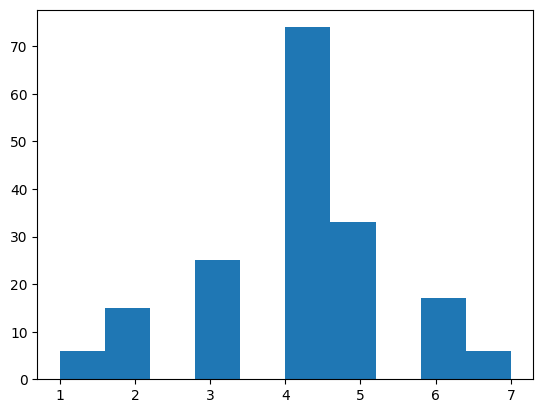

In [ ]:
#히스토그래프 그리기
plt.hist(data['brandpref'])

Text(0.5, 1.0, 'Brandpref Histogram')

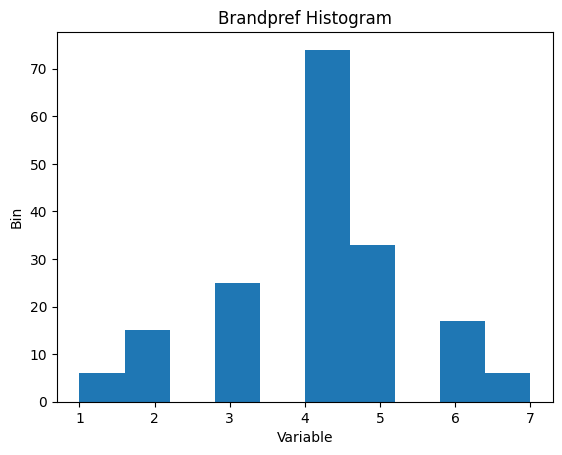

In [ ]:
#히스토그래프 그리기
plt.hist(data['brandpref'])

# x축 레이블 설정
plt.xlabel("Variable")

# y축 레이블 설정
plt.ylabel("Bin")

# 그래프 제목 설정
plt.title("Brandpref Histogram")

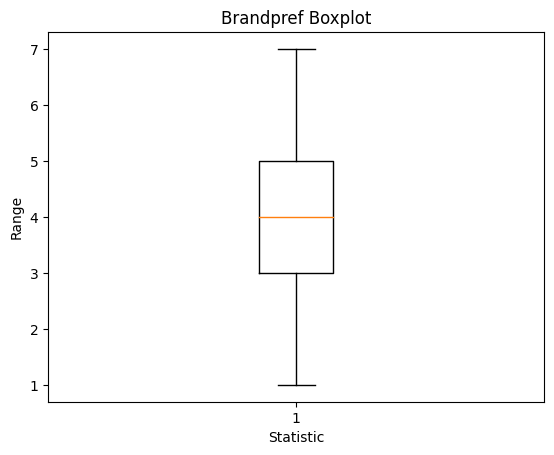

In [ ]:
# 상자그림 그리기
plt.boxplot(data['brandpref'])

# x축 레이블 설정
plt.xlabel("Statistic")

# y축 레이블 설정
plt.ylabel("Range")

# 그래프 제목 설정
plt.title("Brandpref Boxplot")

# 그래프 표시
plt.show()

<Axes: xlabel='gender', ylabel='brandpref'>

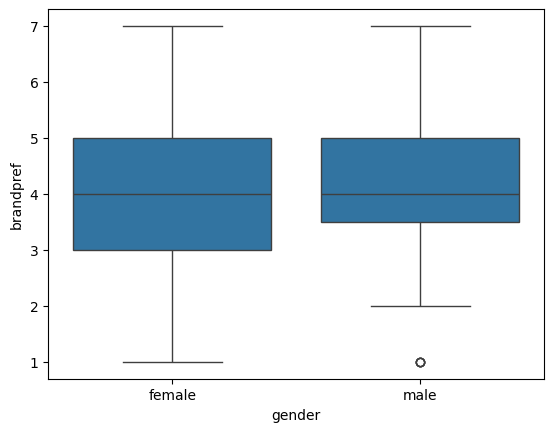

In [ ]:
# 성별에 따른 상자그림 그리기
import seaborn as sns
sns.boxplot(x="gender", y="brandpref", data=data)

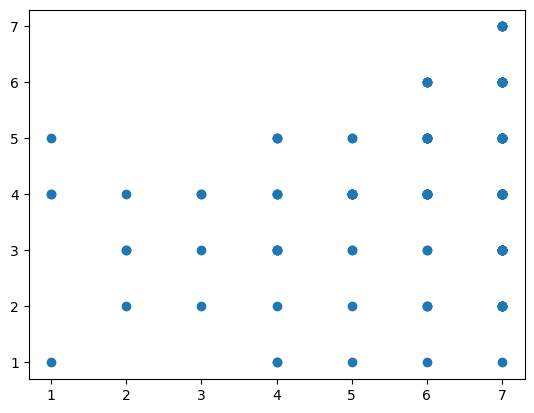

In [ ]:
# 산점도 그리기
plt.scatter(data['brandaware'], data['brandpref'])

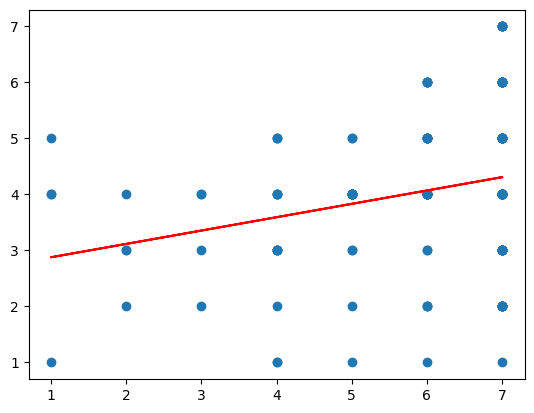

In [ ]:
# 회귀선의 기울기와 절편을 계산합니다.
slope, intercept = np.polyfit(data['brandaware'], data['brandpref'], deg=1)

# 산점도와 회귀선을 그립니다.
plt.scatter(data['brandaware'], data['brandpref'])
plt.plot(data['brandaware'], data['brandaware']*slope + intercept, color='red')

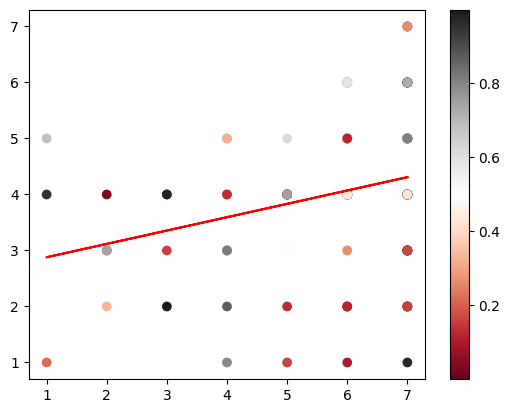

In [ ]:
colors=np.random.rand(176)

# 브랜드 선호도에 따라 색상이 지정된 산점도를 만듭니다.
plt.scatter(data['brandaware'], data['brandpref'], c=colors, cmap='RdGy')
plt.colorbar();

# 회귀선의 기울기와 절편을 계산합니다.
slope, intercept = np.polyfit(data['brandaware'], data['brandpref'], deg=1)

# 회귀선을 그립니다.
plt.plot(data['brandaware'], data['brandaware']*slope + intercept, color='red')

## 척도의 평가

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sampledata(ch11_factor)_eng.csv')

In [ ]:
data.head()

,brandpref1,brandpref2,brandpref3,brandpref4,programpref1,programpref2,programpref3
0,3,3,3,4,3,4,3
1,6,6,6,3,4,4,4
2,5,6,6,5,3,4,4
3,1,1,1,3,7,7,7
4,3,4,2,6,4,3,3


In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=0d2a34c8a58c418676ab578df81f4cd813dca5e6a6a77a23ecbb28f873fe2230
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import pingouin as pg

In [ ]:
import pandas as pd
import pingouin as pg

# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sampledata(ch11_factor)_eng.csv')

# 분석에 사용할 열을 선택합니다.
selected_columns = ["brandpref1", "brandpref2", "brandpref3", "brandpref4"]

# 선택한 열의 데이터를 추출합니다.
data = data[selected_columns]

# Cronbach's alpha 계수를 계산합니다.
cronbach_alpha = pg.cronbach_alpha(data)

# Cronbach's alpha 계수를 출력합니다.
print(f"Cronbach's alpha: {cronbach_alpha[0]:.3f} (n = {cronbach_alpha[1]})")

Cronbach's alpha: 0.873 (n = [0.834 0.906])


In [ ]:
# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sampledata(ch11_factor)_eng.csv')

# 선택할 열 선택
selected_columns = ['brandpref1','brandpref2','brandpref3','brandpref4','programpref1','programpref2','programpref3']

Df_sub = df[selected_columns]
# 요인 분석을 위한 데이터셋
Dataset_factor = Df_sub
# 변수 개수 확인
n_var = Dataset_factor.shape[1]
print("변수 개수:", n_var)

변수 개수: 7


In [ ]:
import pandas as pd
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sampledata(ch11_factor)_eng.csv')

# Calculate KMO
kmo_all, kmo_model = calculate_kmo(data)
print("KMO 값:", kmo_model)

# Bartlett's sphericity test
chi_square_value, p_value = calculate_bartlett_sphericity(data)

# Calculate degrees of freedom for Bartlett's test
data = (data.shape[1] * (data.shape[1] - 1)) / 2

print("Bartlett의 구형성 검정:")
print("Chi-Square 값:", chi_square_value)
print("p-값:", p_value)
print("DF값:", data)

KMO 값: 0.7163963554257539
Bartlett의 구형성 검정:
Chi-Square 값: 591.1676436032353
p-값: 1.1503876997364873e-111
DF값: 21.0


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sampledata(ch11_factor)_eng.csv')

# Select the variables for factor analysis
selected_columns = ['brandpref1','brandpref2','brandpref3','brandpref4','programpref1','programpref2','programpref3']

# Perform factor analysis
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(data[selected_columns])

# Access the communalities
communalities = fa.get_communalities()

# Print the communalities
print(pd.DataFrame(communalities,
index=data[selected_columns].columns,
columns=['Communalities']))

              Communalities
brandpref1         0.849226
brandpref2         0.781682
brandpref3         0.896312
brandpref4         0.224240
programpref1       0.417580
programpref2       0.549701
programpref3       0.998401


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sampledata(ch11_factor)_eng.csv')

# Select the variables for factor analysis
selected_columns = ['brandpref1','brandpref2','brandpref3','brandpref4','programpref1','programpref2','programpref3']

# Perform factor analysis
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(data[selected_columns])

# Access the eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Print the number of components
print("\nNumber of components:", len(eigenvalues))


Number of components: 7


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Load your data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sampledata(ch11_factor)_eng.csv')

# Select the variables for factor analysis
selected_columns = ['brandpref1','brandpref2','brandpref3','brandpref4','programpref1','programpref2','programpref3']

# Perform factor analysis
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(data[selected_columns])

# Access the eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Print the eigenvalues
print("\nEigenvalues:")
for i in range(len(eigenvalues)):
    print(f"Factor {i+1}: {eigenvalues[i]}")

# 요인 분산 데이터프레임을 만듭니다.
variance_df = pd.DataFrame.from_dict({
    'Variance': fa.get_factor_variance(),
    'Proportional Var': fa.get_factor_variance() / sum(fa.get_factor_variance()),
    'Cumulative Var': np.cumsum(fa.get_factor_variance() / sum(fa.get_factor_variance()))
}, orient='index', columns=['Variance', 'Proportional Var', 'Cumulative Var', 'Extra Column', 'Extra Column', 'Extra Column'])

# 요인 분산 데이터프레임을 출력합니다.
print("\nFactor Variance and Cumulative Variance:")
print(variance_df)


Eigenvalues:
Factor 1: 3.3471859225973795
Factor 2: 1.8906245717002983
Factor 3: 0.747032384884005
Factor 4: 0.5279265937196884
Factor 5: 0.20436991322763878
Factor 6: 0.1876382483604161
Factor 7: 0.09522236551057484

Factor Variance and Cumulative Variance:
                                                  Variance  \
Variance          [2.7174412451143657, 1.9997006690598933]   
Proportional Var  [0.7777777777777778, 0.6757458588912197]   
Cumulative Var                                    0.777778   

                                           Proportional Var  \
Variance          [0.3882058921591951, 0.28567152415141334]   
Proportional Var  [0.1111111111111111, 0.09653512269874567]   
Cumulative Var                                     1.453524   

                                            Cumulative Var  Extra Column  \
Variance          [0.3882058921591951, 0.6738774163106085]           NaN   
Proportional Var  [0.1111111111111111, 0.2277190184100345]           NaN   
Cumulative

In [ ]:
!pip install factor_analyzer

In [ ]:
# 데이터 로드
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sampledata(ch11_factor)_eng.csv')

from sklearn.decomposition import FactorAnalysis

# 요인 분석 객체 생성 (베리맥스 회전 사용)
fa = FactorAnalysis(2, rotation='varimax')

# 데이터에 모델을 적합시킵니다.
fa.fit(data)

# 회전된 요인 적재량 가져오기
rotated_factor_loadings = fa.components_

# Convert the rotated factor loadings to a DataFrame
df_factor_loadings = pd.DataFrame(rotated_factor_loadings)

# Print the DataFrame
df_factor_loadings

,0,1,2,3,4,5,6
0,-1.474193,-1.487348,-1.645451,-0.720793,-0.098755,-0.055644,-0.410269
1,0.051212,0.364636,0.200731,-0.058371,0.818656,1.200652,1.472142


## 피어슨 상관분석



In [ ]:
import pandas as pd

# 데이터를 판다스 DataFrame으로 불러오기
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sample_data_final_1_eng.csv')
data.head()

,programtype,dramapref,varietypref,brandaware,brandpref,programaware,programpref,modelaware,modelpref,gender,pplaware,fun,like,reactance,brandattitude,programattitude,job,city,age
0,2,4,4,7,7,7,4,1,1,female,yes,5.00,4.00,6.00,3.00,3.33,student,busan,22
1,2,4,7,7,5,7,5,7,7,male,yes,3.50,6.67,6.00,2.00,2.33,student,busan,24
2,2,5,6,7,3,7,4,7,7,female,yes,4.75,5.00,2.75,4.33,3.67,student,busan,20
3,2,6,2,7,4,3,2,2,2,female,no,3.75,2.00,4.00,6.00,4.00,student,busan,23
4,2,2,7,3,3,6,4,6,6,male,yes,5.00,5.33,4.00,5.67,3.67,student,busan,22


In [ ]:
from scipy.stats.stats import pearsonr
x=data['dramapref']
y=data['varietypref']
pearsonr(x,y)

<ipython-input-46-c55f70f38cb7>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.15682116017003606, pvalue=0.03766135697911788)

In [ ]:
print('상관계수:',pearsonr(x,y)[0])
print('p-value:',pearsonr(x,y)[1])

상관계수: 0.15682116017003606
p-value: 0.03766135697911788


In [ ]:
# Import the scipy.stats module
import scipy.stats

# Perform the linear regression analysis
result = scipy.stats.linregress(x, y)

# Print the results
print('Slope:', result.slope)
print('Intercept:', result.intercept)
print('R-squared:', result.rvalue**2)
print('p-value:', result.pvalue)

Slope: 0.15590759075907565
Intercept: 4.304554455445546
R-squared: 0.02459287627707606
p-value: 0.03766135697911797


In [ ]:
import pandas as pd

# 데이터를 판다스 DataFrame으로 불러오기
data = pd.read_csv('/content/drive/MyDrive/실습샘플데이터 sample_data_final_1_eng.csv')

# 다중회귀분석
from statsmodels.formula.api import ols
model=ols('dramapref ~ varietypref + programpref', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dramapref   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     8.929
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           0.000204
Time:                        00:58:50   Log-Likelihood:                -310.51
No. Observations:                 176   AIC:                             627.0
Df Residuals:                     173   BIC:                             636.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7817      0.426      6.536      0.000       1.942       3.622
varietypref     0.1075      0.074      1.451      0.149      -0.039       0.254
programpref     0.2827      0.078      3.628      0.000       0.129       0.437
==============================================================================
Omnibus:                        1.183   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.553   Jarque-Bera (JB):                1.282
Skew:                          -0.159   Prob(JB):                        0.527
Kurtosis:                       2.730   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as smf
linear_model = smf.ols(formula="dramapref ~ varietypref + programpref", data=data).fit()
print(linear_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.083   
Dependent Variable: dramapref        AIC:                627.0168
Date:               2024-06-05 01:00 BIC:                636.5282
No. Observations:   176              Log-Likelihood:     -310.51 
Df Model:           2                F-statistic:        8.929   
Df Residuals:       173              Prob (F-statistic): 0.000204
R-squared:          0.094            Scale:              2.0296  
------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept        2.7817    0.4256  6.5362  0.0000   1.9417  3.6217
varietypref      0.1075    0.0741  1.4507  0.1487  -0.0388  0.2538
programpref      0.2827    0.0779  3.6283  0.0004   0.1289  0.4365
-----------------------------------------------------------------
Omnibus:             

## Chapter 3. 데이터 프레임과 시리즈

### 3.1. 데이터 프레임(dataframe)

#### 3.1.1. 데이터 프레임이란?

#### 3.1.2. 데이터 프레임의 구조 확인하기

In [ ]:
# 코드1. 데이터 프레임의 구조를 확인하기 위해 데이터 프레임 df를 생성하는 코드
import pandas as pd
df = pd.DataFrame([[63,93,97], [89, 83, 71], [83, 76, 92], [94, 88, 73]],
                  index=['김판다', '강승주', '송중기', '권보아'],
                  columns=['국어', '영어', '수학'])
df

,국어,영어,수학
김판다,63,93,97
강승주,89,83,71
송중기,83,76,92
권보아,94,88,73


In [ ]:
# 코드2. index 속성은 데이터 프레임의 인덱스를 반환한다.
df.index

Index(['김판다', '강승주', '송중기', '권보아'], dtype='object')

In [ ]:
# 코드3. columns 속성은 데이터 프레임의 컬럼즈를 반환한다.
df.columns

Index(['국어', '영어', '수학'], dtype='object')

In [ ]:
# 코드4. T(transpose)속성은 데이터 프레임의 행과 열을 맞교환한다
df.T

,김판다,강승주,송중기,권보아
국어,63,89,83,94
영어,93,83,76,88
수학,97,71,92,73


In [ ]:
# 코드5. values 속성은 데이터 프레임의 밸류즈를 반환한다.
df.values

array([[63, 93, 97],
       [89, 83, 71],
       [83, 76, 92],
       [94, 88, 73]])

In [ ]:
# 코드6. 데이터 프레임을 bool 데이터프레임으로 바꾸기
df > 90

,국어,영어,수학
김판다,False,True,True
강승주,False,False,False
송중기,False,False,True
권보아,True,False,False


#### 3.1.3. 데이터프레임 생성하기

In [ ]:
# 코드7. DataFrame 함수에 2차원 리스트를 데이터로 입력
import pandas as pd
data1 = [[63, 93, 97], [89, 83, 71], [83, 76, 92], [94, 88, 73]]
df = pd.DataFrame(data1)
df

,0,1,2
0,63,93,97
1,89,83,71
2,83,76,92
3,94,88,73


In [ ]:
# 코드8. index 인자에 원하는 인덱스 입력하기
df = pd.DataFrame(data1, index=['김판다', '강승주', '송중기', '권보아'])
df

,0,1,2
김판다,63,93,97
강승주,89,83,71
송중기,83,76,92
권보아,94,88,73


In [ ]:
# 코드9. columns 인자에 원하는 컬럼즈 입력하기
df = pd.DataFrame(data1,
                  index=['김판다', '강승주', '송중기', '권보아'],
                  columns=['국어', '영어', '수학'])
df

,국어,영어,수학
김판다,63,93,97
강승주,89,83,71
송중기,83,76,92
권보아,94,88,73


In [ ]:
# 코드10. 딕셔너리로 데이터 프레임 생성하기
data2 = {'국어': {'김판다': 63, '강승주': 89, '송중기': 83, '권보아': 94},
         '영어': {'김판다': 93, '강승주': 83, '송중기': 76, '권보아': 88},
         '수학': {'김판다': 97, '강승주': 71, '송중기': 92, '권보아': 73}}
df = pd.DataFrame(data2)
df

,국어,영어,수학
김판다,63,93,97
강승주,89,83,71
송중기,83,76,92
권보아,94,88,73


#### 3.1.4. 인자(parameter)와 인수(argument), 기본값(default)


### 3.2. 시리즈

#### 3.2.1. 시리즈란?

#### 3.2.2. 시리즈 만들기

In [ ]:
# 코드11. Series 함수에 1차원 리스트를 데이터로 입력
s = pd.Series([93, 83, 76, 88])
s

0    93
1    83
2    76
3    88
dtype: int64

In [ ]:
# 코드12. index 인자에 원하는 인덱스 입력하기
s = pd.Series([93, 83, 76, 88],index=['김판다', '강승주', '송중기', '권보아'])
s

김판다    93
강승주    83
송중기    76
권보아    88
dtype: int64

In [ ]:
# 코드13. 데이터 프레임의 열에서 시리즈 추출하기
df['영어']

김판다    93
강승주    83
송중기    76
권보아    88
Name: 영어, dtype: int64

#### 3.2.3. 시리즈의 인덱스(index)와 밸류즈(values) 확인하기

In [ ]:
# 코드14. index 속성은 시리즈의 인덱스를 반환한다.
s.index

Index(['김판다', '강승주', '송중기', '권보아'], dtype='object')

In [ ]:
# 코드15. values 속성은 시리즈의 밸류즈를 반환한다.
s.values

array([93, 83, 76, 88])

In [ ]:
# 코드16. 시리즈를 bool 시리즈로 바꾸기
s > 90

김판다     True
강승주    False
송중기    False
권보아    False
dtype: bool

### 3.3. 데이터 프레임 불러오기

#### 3.3.1. 엑셀 파일에서 데이터 프레임 불러오기 read_excel

In [ ]:
# 코드17. 엑셀 파일의 첫 번째 시트를 데이터 프레임으로 불러오기
import pandas as pd
url1 = 'https://github.com/panda-kim/book1/blob/main/01read_excel.xlsx?raw=true'
df = pd.read_excel(url1)
df

,이름,국어,영어,수학
0,김판다,63,93,97
1,강승주,89,83,71
2,송중기,83,76,92
3,권보아,94,88,73


In [ ]:
# 코드18. 엑셀 파일의 두 번째 시트를 데이터 프레임으로 불러오기
df = pd.read_excel(url1, sheet_name='sheet_name')
df

,두,번,째,시트
0,김판다,63,93,97
1,강승주,89,83,71
2,송중기,83,76,92
3,권보아,94,88,73


In [ ]:
# 코드19. 시트의 로케이션으로 두 번째 시트 불러오기
df = pd.read_excel(url1, sheet_name=1)
df

,두,번,째,시트
0,김판다,63,93,97
1,강승주,89,83,71
2,송중기,83,76,92
3,권보아,94,88,73


In [ ]:
# 코드20. 세 번째 행을 컬럼즈로 지정해 세 번째 시트 불러오기
df = pd.read_excel(url1, sheet_name=2, header=2)
df

,세,번,째,시트
0,김판다,63,93,97
1,강승주,89,83,71
2,송중기,83,76,92
3,권보아,94,88,73


In [ ]:
# 코드21. 맨 왼쪽 열을 인덱스로 지정해 네 번째 시트 불러오기
df = pd.read_excel(url1, sheet_name=3, index_col=0)
df

,국어,영어,수학
김판다,63,93,97
강승주,89,83,71
송중기,83,76,92
권보아,94,88,73


In [ ]:
# 코드22. 다섯 번째 시트를 불러 오면서 학생코드 열을 문자열로 지정
df = pd.read_excel(url1, sheet_name=4, dtype={'학생코드':'str'})
df

,이름,학생코드,국어,영어,수학
0,김판다,01,63,93,97
1,강승주,02,89,83,71
2,송중기,03,83,76,92
3,권보아,04,94,88,73


#### 3.3.2. csv 파일에서 데이터 프레임 불러오기 read_csv


In [ ]:
# 코드23. csv 파일에서 데이터 프레임 불러오기
url1 = 'https://github.com/panda-kim/book1/blob/main/02read_csv1.csv?raw=true'
df = pd.read_csv(url1)
df

,이름,국어,영어,수학
0,김판다,63,93,97
1,강승주,89,83,71
2,송중기,83,76,92
3,권보아,94,88,73


In [ ]:
# 코드24. 인코딩을 EUC-KR로 데이터 프레임 불러오기
url2 = 'https://github.com/panda-kim/book1/blob/main/03read_csv2.csv?raw=true'
df = pd.read_csv(url2, encoding='EUC-KR')
df

,이름,국어,영어,수학
0,김판다,63,93,97
1,강승주,89,83,71
2,송중기,83,76,92
3,권보아,94,88,73


만약 인코딩 방식을 지정하지 않으면 다음과 같은 에러가 발생한다

```python
pd.read_csv(url2)
```

```python
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 0: invalid start byte
```

### 3.4. 데이터 프레임 저장하기

#### 3.4.1. 딕셔너리로 변환하기

In [ ]:
# 코드25. df를 to_dict 메서드로 딕셔너리로 변환하자
df.to_dict()

{'이름': {0: '김판다', 1: '강승주', 2: '송중기', 3: '권보아'},
 '국어': {0: 63, 1: 89, 2: 83, 3: 94},
 '영어': {0: 93, 1: 83, 2: 76, 3: 88},
 '수학': {0: 97, 1: 71, 2: 92, 3: 73}}

#### 3.4.2. 파일로 저장하기

In [ ]:
# 코드26. df를 엑셀파일(1.xlsx)로 저장
df.to_excel('1.xlsx')

In [ ]:
# 코드27. index를 제외하고 엑셀파일로 저장
df.to_excel('1.xlsx', index=False)

In [ ]:
# 코드28. df를 인덱스를 제외하고 csv파일(2.csv)로 저장
df.to_csv('2.csv', index=False)

In [ ]:
# 코드29.
pd.DataFrame.to_dict(df)

{'이름': {0: '김판다', 1: '강승주', 2: '송중기', 3: '권보아'},
 '국어': {0: 63, 1: 89, 2: 83, 3: 94},
 '영어': {0: 93, 1: 83, 2: 76, 3: 88},
 '수학': {0: 97, 1: 71, 2: 92, 3: 73}}